This example shows how to use the PyVLM class to generate the wing planform of the Pilatus PC12, apply the Vortex Lattice Method and obtain CL(alpha) and CD(alpha) for single values and a range of values of AoA.

The right wing will be defined using the following nomenclature while the left wing will be created as its specular image:                           
![pilatusPC12](pc12.png)

The geometry is defined as follows:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from vlm import PyVLM

pilatusPC12 = PyVLM()

# Geometry parameters
A = np.array([0, 1.03])  # root chord leading edge position
B = np.array([.414, 8.14])  # tip chord leading edge position
chord_1 = 2.15  # root chord length
chord_2 = 1.24  # tip chord length

leading_edges_position = [A, B]  # root, tip
chord_length = [chord_1, chord_2]  # root, tip

The default wing profile is the NACA2412 (this will change in the future to allow customization). The mesh is generated using the "add_wing" method of the PyVLM class, and visualize using "check_mesh":

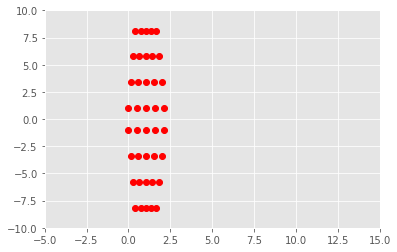

In [2]:
n, m = 4, 3  # number of panels (chordwise, spanwise)
pilatusPC12.add_wing(leading_edges_position, chord_length, n, m)
pilatusPC12.check_mesh(plot_mesh=True)

In case the output for a single value of alpha is desired (in this case AoA = 2deg), the following line will print the aerodynamic data (calculated by the VLM) of each panel:

In [3]:
pilatusPC12.vlm(alpha=2, print_output=True)


Panel|  V∞_n |   Wi   |  α_i  |   Γ   |   cl   |   cd    |
----------------------------------------------------------
   0 |  0.03 |  -0.18 | 10.27 |  0.05 |  0.200 | 0.03615 |
   1 |  0.03 |  -0.13 |  7.41 |  0.06 |  0.281 | 0.03659 |
   2 |  0.03 |  -0.23 | 13.11 |  0.05 |  0.269 | 0.06269 |
   3 | -0.03 |  -0.26 | 14.32 |  0.09 |  0.365 | 0.09307 |
   4 | -0.03 |  -0.15 |  8.38 |  0.09 |  0.411 | 0.06054 |
   5 | -0.03 |  -0.30 | 16.86 |  0.07 |  0.403 | 0.12214 |
   6 | -0.06 |  -0.33 | 18.22 |  0.07 |  0.292 | 0.09625 |
   7 | -0.06 |  -0.16 |  9.35 |  0.07 |  0.327 | 0.05380 |
   8 | -0.06 |  -0.37 | 20.48 |  0.06 |  0.320 | 0.11962 |
   9 | -0.09 |  -0.39 | 21.33 |  0.05 |  0.206 | 0.08055 |
  10 | -0.09 |  -0.18 | 10.27 |  0.05 |  0.228 | 0.04139 |
  11 | -0.09 |  -0.43 | 23.45 |  0.04 |  0.224 | 0.09717 |
  12 |  0.03 |  -0.23 | 13.11 |  0.05 |  0.269 | 0.06269 |
  13 |  0.03 |  -0.13 |  7.41 |  0.06 |  0.281 | 0.03659 |
  14 |  0.03 |  -0.18 | 10.27 |  0.05 |  0.200 | 0.0361

Finally, for a range of values of angle of attack [-15, 15] degrees, the aerodynamic forces coefficients CL, CD are obtained as lists returned from the method "aerodyn_forces_coeff" (along with alpha):

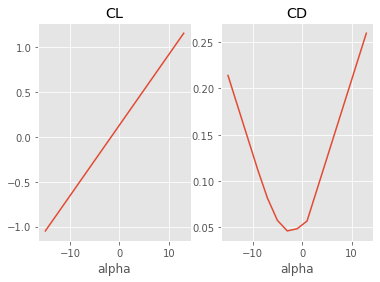

In [4]:
alpha, CL, CD = pilatusPC12.aerodyn_forces_coeff()

plt.style.use('ggplot')

plt.subplot(1, 2, 1)
plt.title("CL")
plt.xlabel("alpha")
plt.plot(alpha, CL)

plt.subplot(1, 2, 2)
plt.title("CD")
plt.xlabel("alpha")
plt.plot(alpha, CD)

plt.show()